---
title: Welcome to Lasers and Optomechanics!
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
---

In [1]:
#| "tags": [ "hide-input",]
%matplotlib widget
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        # "font.family": "serif",
        # "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

# Interactivity

This class will make use of the interactivity of a Jupyter notebook.  
Many of the plots will feature interactive sliders or 3D plots that can be better visualized with a live kernel.

In the Jupyter Book, it is possible to launch a kernel in Binder but it takes an absolute age to load,
and when if finally does load the interactivity is very slow.

Better is to `git clone` the course content at [https://github.com/ccahilla/lasers-and-optomechanics](https://github.com/ccahilla/lasers-and-optomechanics),
create the `lasers` python environment defined in `environment.yml` via `conda` or `mamba`,
then run the Jupyter notebooks in Jupyter Lab yourself.


**I highly recommend downloading or running the Jupyter notebooks for lectures and homeworks yourself to better understand the course content.**
The syllabus has some instructions for downloading 

Also, if you make a useful demo in your homeworks or otherwise, please feel free to contribute it back to the course.

Below is an interactive sine wave plot, illustrating an interactive sine wave plot of $\sin(\omega t + \theta)$. 

interactive(children=(FloatSlider(value=1.0, description='ww', max=3.0, min=-1.0), FloatSlider(value=0.0, desc…

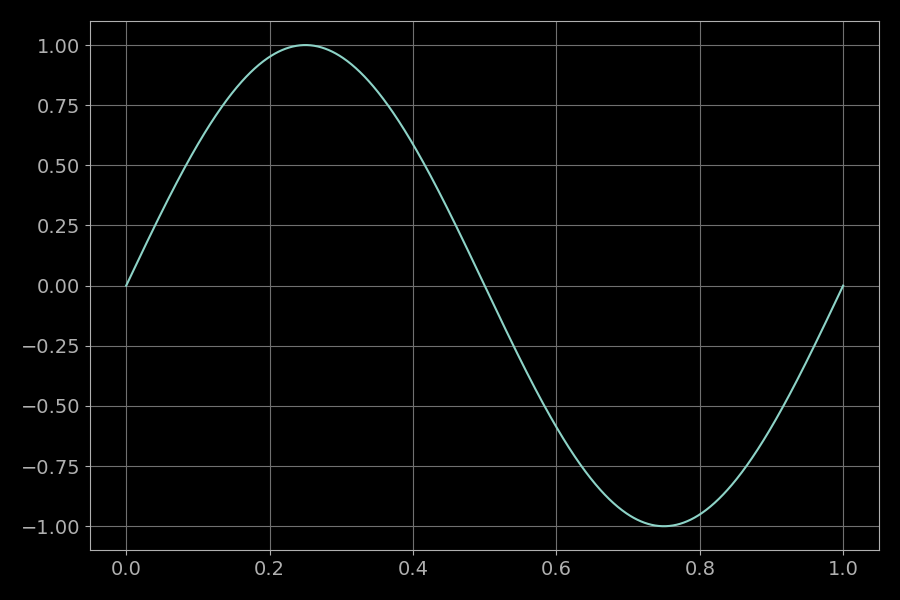

In [2]:
xx = np.linspace(0, 1, 1000)
kk = 2 * np.pi 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(xx, np.sin(kk * xx))
ax.grid()

def update(ww = 1.0, theta = (-np.pi, np.pi)):
    line.set_ydata(np.sin(ww  * kk * xx + theta))
    fig.canvas.draw_idle()

interact(update);

# Phasors and Complex Numbers Review

Here we will review complex numbers, as they will form the basis of the math in this course.  
In short, it is often convenient to express light fields as complex quantities, although all electric fields and magnetic fields associated with light must be *real-valued* in the end.
Typically, this can easily be achieved by simply taking the real part of the complex quantity.


## Complex Numbers

### Cartesian Form

A *complex number* $z \in \mathbb{C}$ a single number made up of a *real* and *imaginary* component, which are totally independent of one another.
Often, the complex number $z$ is broken down into it's components like so
$$z = a + ib$$
where $z$ is the complex number,

$a$ and $b$ are real numbers,

and $i$ is the imaginary unit equal to $\sqrt{-1}$.

Another way to think about this is $a$ is the Real component of $z$, and $b$ is the Imaginary component of $z$:
$$a = \Re(z), \quad b = \Im(z)$$

### Complex Plane 

Complex numbers can be thought of as occupying a *complex plane* in the same way as the $x-y$ plane, 
with real and imaginary components described by $1$ and $i$ rather than unit vectors $\hat{x}$ and $\hat{y}$.
This is often illustrated by a vector-like plot (see the interactive plot below).
The complex plane houses all of the possible complex numbers, represented by $\mathbb{C}$, which is simply a two-dimensional real space $\mathbb{R}^2$.

### Polar Form

Another useful form for representing a complex number is *polar form*:
$$z = r e^{i \theta}$$
where $r$ represents the radial distance away from the $(0,0)$ point of the complex plane,
and $\theta$ is the counterclockwise angle the complex number makes with the x-axis.
These can be calculated from the above expressions:

$$r = \sqrt{a^2 + b^2}, \quad \theta = \arctan\left(\dfrac{b}{a}\right)$$

$r$ is often described as the magnitude of the complex number: $r = |z|$,
while $\theta$ is the argument: $\theta = \arg(z)$

### Complex Conjugate

Finally, we introduce the concept of the *complex conjugate* $z^*$ of a complex number $z$.
A complex conjugate $z^*$ is simply equal to the original complex number with its imaginary sign flipped:
$$z^* = a - i b.$$

Equivalently, in polar form, our angle is $-\theta$ instead of $\theta$:
$$z^* = r e^{-i \theta}.$$

This can all be derived by taking wherever you see the imaginary unit $i$ in an equation, and replacing it with $-i$.

interactive(children=(FloatSlider(value=3.0, description='$a$:', max=5.0, min=-5.0, readout_format='.3f', step…

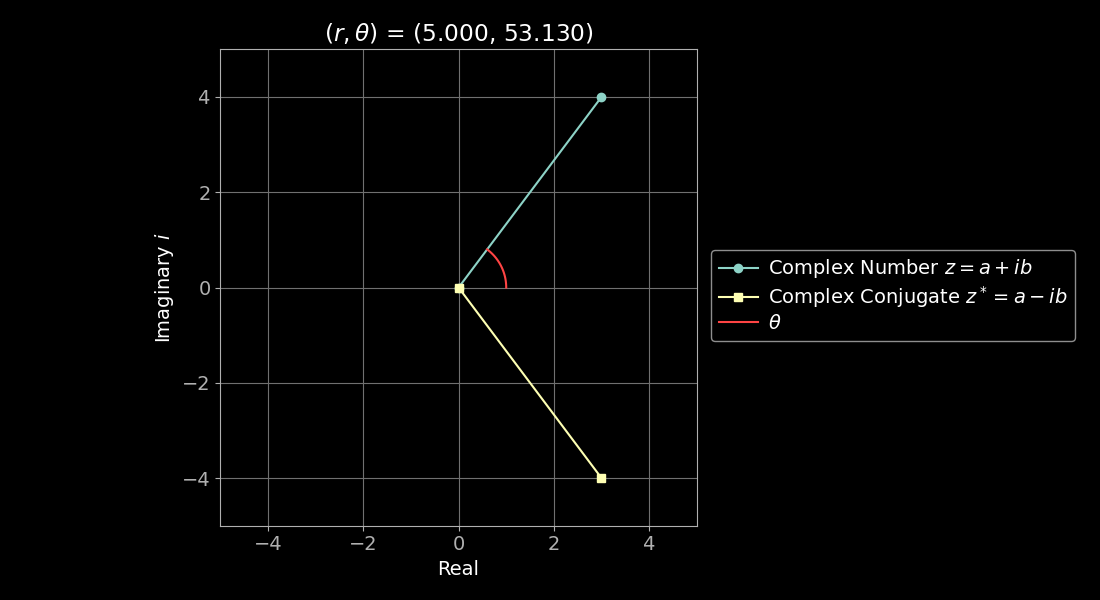

In [3]:
#| label: fig:complex_numbers
#| "tags": [ "hide-input",]
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot()

aa = 3.0
bb = 4.0
rr = np.sqrt(aa**2 + bb**2)
theta = 180/np.pi * np.arctan2(bb, aa)

thetas = np.linspace(np.pi * theta / 180, 0, 100)
xxs = np.cos(thetas)
yys = np.sin(thetas)

line1, = ax.plot([0, aa], [0, bb], 'o-', label="Complex Number $z = a + i b$")
line2, = ax.plot([0, aa], [0, -bb], 's-', label="Complex Conjugate $z^* = a - i b$")
arc1, = ax.plot(xxs, yys, color="#ff4444", label=r"$\theta$")

ax.set_xlabel("Real")
ax.set_ylabel("Imaginary $i$")
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.grid()

ax.set_title(r"(r, \theta) = (" + f"({rr:.3f}, {theta:.3f})")

ax.legend(bbox_to_anchor=(1.01, 0.6))
ax.set_aspect('equal')
# plt.tight_layout()

def update_complex_number(
    aa_slider_value=aa,
    bb_slider_value=bb,
):
    """
    Create waves plot with synchronized cosine and sine displays.
    """
    aa = aa_slider_value
    bb = bb_slider_value

    rr = np.sqrt(aa**2 + bb**2)
    theta = 180/np.pi * np.arctan2(bb, aa)

    newthetas = np.linspace(np.pi * theta / 180, 0, 100)
    newxxs = np.cos(newthetas)
    newyys = np.sin(newthetas)
    
    # Calculate sine
    newx1 = [0, aa]
    newy1 = [0, bb]
    newx2 = [0, aa]
    newy2 = [0, -bb]

    line1.set_xdata(newx1)
    line1.set_ydata(newy1)
    line2.set_xdata(newx2)
    line2.set_ydata(newy2)
    arc1.set_xdata(newxxs)
    arc1.set_ydata(newyys)

    ax.set_title(r"$(r, \theta)$ = " + f"({rr:.3f}, {theta:.3f})")
    
    fig.canvas.draw_idle()
    return

# Create interactive widget
aa_slider = FloatSlider(
    value=aa,
    min=-5,
    max=5,
    step=0.01,
    description="$a$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
bb_slider = FloatSlider(
    value=bb,
    min=-5,
    max=5,
    step=0.01,
    description="$b$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(
    update_complex_number, 
    aa_slider_value=aa_slider, 
    bb_slider_value=bb_slider,
)
plt.show()

```{exercise}
:label: complex-numbers-exercise1

Calculate and draw a graph of the sum and difference of a complex number $z$ and it's complex conjugate $z^*$:
$$z + z^*$$ 
and
$$z - z^*$$

What are their values in Cartesian and Polar form?
```

```{solution} complex-numbers-exercise1
:label: complex-numbers-solution
:class: dropdown

I will leave the graphing up to you, make adjustments to the above code if you are feeling inspired.
From the definitions above, we have for Cartesian form
$$z + z^* = 2 a$$
and 
$$z - z^* = 2 i b$$

For Polar form, we have to remember some trig identities: $\cos\theta = \dfrac{1}{2}(e^{i \theta} + e^{-i \theta})$ and $\sin\theta = \dfrac{1}{2 i}(e^{i \theta} - e^{-i \theta})$
then 
$$z + z^* = r e^{i \theta} + r e^{-i \theta} = 2 r \cos\theta$$
and
$$z + z^* = r e^{i \theta} - r e^{-i \theta} = 2 i r \sin\theta$$
```

interactive(children=(FloatSlider(value=0.0, description='θ (rad):', max=6.283185307179586, readout_format='.3…

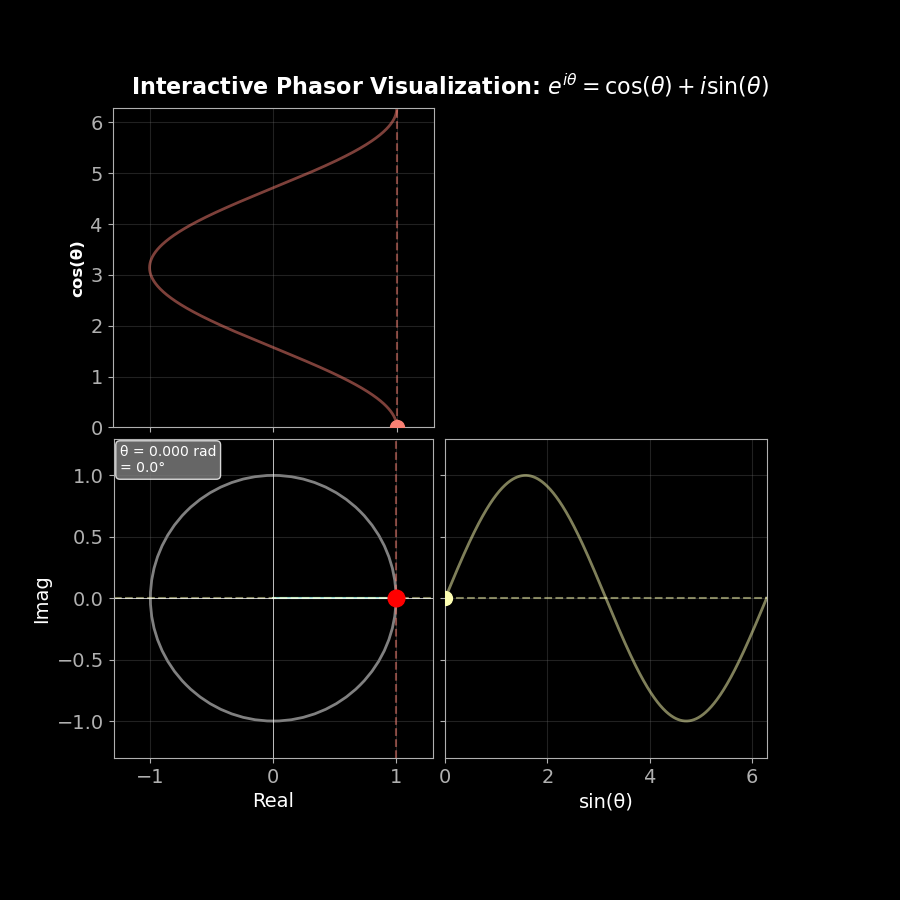

In [4]:
#| label: complex_number
#| "tags": [ "hide-input",]

# Create figure with custom layout
fig = plt.figure(figsize=(9, 9))
fig.set_tight_layout(False)
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 0.1], width_ratios=[1, 1, 0.1],
                      hspace=0.05, wspace=0.05)

# Create subplots
ax_cos = fig.add_subplot(gs[0, 0])      # Cosine plot (top)
ax_phasor = fig.add_subplot(gs[1, 0])  # Phasor plot (center)
ax_sin = fig.add_subplot(gs[1, 1])     # Sine plot (right)

theta = 0 # initial values

cos_val = np.cos(theta)
sin_val = np.sin(theta)

# Generate full curves
theta_range = np.linspace(0, 2*np.pi, 1000)
cos_curve = np.cos(theta_range)
sin_curve = np.sin(theta_range)

# Setup cosine plot (top)
ax_cos.plot(cos_curve, theta_range, '-', color='C3', linewidth=2, alpha=0.5)
cos_dot,     = ax_cos.plot([cos_val], [theta], 'o', color='C3', markersize=10, zorder=5)
cos_val_line = ax_cos.axvline(cos_val, color='C3', linestyle='--', alpha=0.5)

ax_cos.set_xlim(-1.3, 1.3)
ax_cos.set_ylim(0, 2*np.pi)
ax_cos.set_ylabel('cos(θ)', fontsize=12, fontweight='bold')
ax_cos.grid(True, alpha=0.3)
ax_cos.axhline(0, linewidth=0.5)
ax_cos.set_xticklabels([])

# Setup phasor plot (center)
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linewidth=2)
ax_phasor.add_patch(circle)

# Draw phasor arrow
# arrow = FancyArrowPatch((0, 0), (cos_val, sin_val),
#                        arrowstyle='->', mutation_scale=20, 
#                        linewidth=3, color='red', zorder=4)
# ax_phasor.add_patch(arrow)

phasor_line, = ax_phasor.plot([0,cos_val],[0,sin_val])
phasor_sin_line = ax_phasor.axhline(sin_val, color='C1', linestyle='--', alpha=0.5)
phasor_cos_line = ax_phasor.axvline(cos_val, color='C3', linestyle='--', alpha=0.5)
phasor_dot, = ax_phasor.plot([cos_val], [sin_val], 'ro', markersize=12, zorder=5)

ax_phasor.set_xlim(-1.3, 1.3)
ax_phasor.set_ylim(-1.3, 1.3)
ax_phasor.set_aspect('equal')
ax_phasor.axhline(0, linewidth=0.5)
ax_phasor.axvline(0, linewidth=0.5)
ax_phasor.set_xlabel('Real')
ax_phasor.set_ylabel('Imag')
ax_phasor.grid(True, alpha=0.3)
# ax_phasor.set_title('Phasor: $e^{i\\theta}$', fontsize=14, pad=10, fontweight='bold')

# Add text annotation
ax_phasor.text(0.02, 0.98, f'θ = {theta:.3f} rad\n= {np.degrees(theta):.1f}°',
               transform=ax_phasor.transAxes, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='grey', alpha=0.8),
               fontsize=10)

# Setup sine plot (right)
ax_sin.plot(theta_range, sin_curve, color="C1", linewidth=2, alpha=0.5)
sin_dot, = ax_sin.plot([theta], [sin_val], 'o', color="C1", markersize=10, zorder=5)
sin_val_line = ax_sin.axhline(sin_val, color='C1', linestyle='--', alpha=0.5)
ax_sin.set_xlim(0, 2*np.pi)
ax_sin.set_ylim(-1.3, 1.3)
ax_sin.set_xlabel('sin(θ)')
# ax_sin.set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax_sin.set_yticklabels([])
ax_sin.grid(True, alpha=0.3)
ax_sin.axvline(0, color='k', linewidth=0.5)

plt.suptitle('Interactive Phasor Visualization: $e^{i\\theta} = \\cos(\\theta) + i\\sin(\\theta)$', 
             fontsize=16, y=0.92, fontweight='bold')

# plt.tight_layout()
# plt.show()

def update_phasor(theta_slider_value=1):
    """
    Create phasor plot with synchronized cosine and sine displays.
    
    Parameters:
    -----------
    theta : float
        Angle in radians (0 to 2π)
    """
    theta = theta_slider_value
    
    # Calculate phasor components
    cos_val = np.cos(theta)
    sin_val = np.sin(theta)

    cos_dot.set_xdata([cos_val])
    cos_dot.set_ydata([theta])
    cos_val_line.set_xdata([cos_val,cos_val])

    phasor_line.set_xdata([0,cos_val])
    phasor_line.set_ydata([0,sin_val])
    phasor_sin_line.set_ydata([sin_val, sin_val])
    phasor_cos_line.set_xdata([cos_val, cos_val])
    phasor_dot.set_xdata([cos_val])
    phasor_dot.set_ydata([sin_val])

    sin_dot.set_xdata([theta])
    sin_dot.set_ydata([sin_val])
    sin_val_line.set_ydata([sin_val,sin_val])

    # fig.canvas.draw()
    # fig.canvas.flush_events()
    fig.canvas.draw_idle()
    return

# Create interactive widget
theta_slider = FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ (rad):',
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(update_phasor, theta_slider_value=theta_slider)
plt.show()

```{exercise}
:label: complex-ii

Using Euler's formula, calculate $i^i$.
```

```{solution} complex-ii
:label: complex-ii-solution
:class: dropdown

First, we express $i$ in terms of an exponential.
Starting with 
\begin{align}
e^{i \theta} = \cos(\theta) + i \sin(\theta)
\end{align}
we see that we get a purely imaginary expression when $\theta = \dfrac{\pi}{2}$.

This gives us $i = e^{i \frac{\pi}{2}}$

Now, $i^i$ can be rewritten as 
$$i^i = \left(e^{i \frac{\pi}{2}}\right)^i = e^{i \frac{\pi}{2} \cdot i } = e^{-\frac{\pi}{2} }$$
```

```{exercise}
:label: sine-cosine

Using Euler's formula, derive the sine and cosine trig sum expressions: $\sin(A + B)$ and $\cos(A + B)$.
```

```{solution} sine-cosine
:label: sine-cosine-solution
:class: dropdown

First, look at $e^{i (A + B)}$
\begin{align}
\label{eq:exp_sum}
e^{i (A + B)} = \cos(A + B) + i \sin(A + B)
\end{align}

Then separate it into to exponentials:
\begin{align}
e^{i (A + B)} &= e^{i A} e^{i B} \\
&= \Big[\cos(A) + i \sin(A)\Big]\Big[\cos(B) + i \sin(B)\Big] \\
&= \Big[\cos(A) \cos(B) - \sin(A) \sin(B)\Big] + i \Big[ \cos(A) \sin(B) + \cos(B) \sin(A)\Big]
\end{align}

Matching coefficients from [](#eq:exp_sum) gives
\begin{align}
\cos(A + B) &= \cos(A) \cos(B) - \sin(A) \sin(B) \\
\sin(A + B) &= \cos(A) \sin(B) + \cos(B) \sin(A)
\end{align}
```

### <span style="color: #ff5500">Sum of two complex numbers</span>

In the last example we looked at the sum of a complex number with it's own complex conjugate, 
and found it was always a real number.

For two arbitrary complex numbers $u, v$, this is not always the case.

Because it will be useful going forward when we discuss superposition and interference, 
we state some properties of sums of complex numbers.

#### Cartesian Sum
This one is straightforward, because of the independence of real and imaginary components:
\begin{align}
u &= a + i b\\
v &= c + i d\\
u + v &= (a + c) + i (b + d)
\end{align}

#### Polar Sum
This one is less straightforward or immediately useful, but we tend to describe electric fields in polar form, so it is helpful to have this in mind
\begin{align}
u &= r_1 e^{i \theta_1}\\
v &= r_2 e^{i \theta_2}\\
u + v &= r_1 e^{i \theta_1} + r_2 e^{i \theta_2}\\
u + v &= r_1 (\cos\theta_1 + i \sin\theta_1) + r_2 (\cos\theta_2 + i \sin\theta_2)\\
u + v &= r_1 \cos\theta_1 + r_2 \cos\theta_2 + i ( r_1 \sin\theta_1 + r_2 \sin\theta_2 )
\end{align}

